# Telco Churn Classification Project

Plan --- **Acquire** --- Prepare --- Explore --- Model --- Deliver

## Acquire

In [1]:
#import needed libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pydataset import data

#import ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# acquire
from env import host, user, password
import acquire

In [3]:
# Create helper function to get the necessary connection url.

def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [4]:
#acquire function
def get_telco_churn_data():
    '''
    This function reads in the iris data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    
    sql_query = '''
    SELECT *
    FROM customers
    JOIN contract_types ON customers.contract_type_id = contract_types.contract_type_id
    JOIN payment_types ON customers.payment_type_id = payment_types.payment_type_id
    JOIN internet_service_types ON customers.internet_service_type_id = internet_service_types.internet_service_type_id
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))

In [5]:
# call acquire function and take a look
df = get_telco_churn_data()

In [6]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,payment_type_id,payment_type,internet_service_type_id,internet_service_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,2,Mailed check,1,DSL
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,4,Credit card (automatic),1,DSL
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,3,Bank transfer (automatic),1,DSL
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,4,Credit card (automatic),1,DSL
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,3,Bank transfer (automatic),1,DSL


<hr style="border:2px solid black"> </hr>

## Prepare

Plan --- Acquire --- **Prepare** --- Explore --- Model --- Deliver

In [7]:
# import prepare

In [8]:
def prep_telco_churn(df):
    '''
    This function takes in the telco_churn df acquired by get_telco_churn_data
    Returns the telco_churn df.
    '''
    # drop duplicate columns from join
    df = df.loc[:, ~df.columns.duplicated()]
    
    # change data types
    df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
    df.replace({'churn': {'No':0, 'Yes':1}}, inplace=True)
    
    #drop duplicates
    df.drop_duplicates(inplace=True)

    #create dummies
    dummy_df = pd.get_dummies(df[['internet_service_type_id','contract_type_id']], dummy_na = False, drop_first=[True,True])
    #concat dummies with original df
    df= pd.concat([df, dummy_df], axis=1)

    return df

In [9]:
#reassign prep_telco_churn(df) to just df
df = prep_telco_churn(df)

In [10]:
#call df and look at it
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,internet_service_type_id,contract_type_id
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,2,90.45,5957.90,0,Two year,Mailed check,DSL,1,3
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,4,45.20,2460.55,0,Two year,Credit card (automatic),DSL,1,3
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,No,3,45.05,2560.10,0,Two year,Bank transfer (automatic),DSL,1,3
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,Yes,4,39.40,825.40,0,Two year,Credit card (automatic),DSL,1,3
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,Yes,3,85.15,6316.20,0,Two year,Bank transfer (automatic),DSL,1,3


<hr style="border:2px solid black"> </hr>

## Explore

Plan --- Acquire --- Prepare --- **Explore** --- Model --- Deliver

In [11]:
#take a look at the data
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,internet_service_type_id,contract_type_id
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,2,90.45,5957.90,0,Two year,Mailed check,DSL,1,3
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,4,45.20,2460.55,0,Two year,Credit card (automatic),DSL,1,3
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,No,3,45.05,2560.10,0,Two year,Bank transfer (automatic),DSL,1,3
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,Yes,4,39.40,825.40,0,Two year,Credit card (automatic),DSL,1,3
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,Yes,3,85.15,6316.20,0,Two year,Bank transfer (automatic),DSL,1,3


In [13]:
#data has int and object data types
#look at column names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

### data summary:
- 18 object data types
- 8 integer data types
- 1 float data type
- 0 null values

In [16]:
#descriptive statistics
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,contract_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,2279.734304,0.265370,1.872923,1.690473
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,2266.794470,0.441561,0.737796,0.833755
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,398.550000,0.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1394.550000,0.000000,2.000000,1.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,3786.600000,1.000000,2.000000,2.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,8684.800000,1.000000,3.000000,3.000000


In [18]:
#we are trying to determine churn... look into that
df.churn.value_counts()

#this shows 26.54% of customers churn (1869 out of 7043)

0    5174
1    1869
Name: churn, dtype: int64

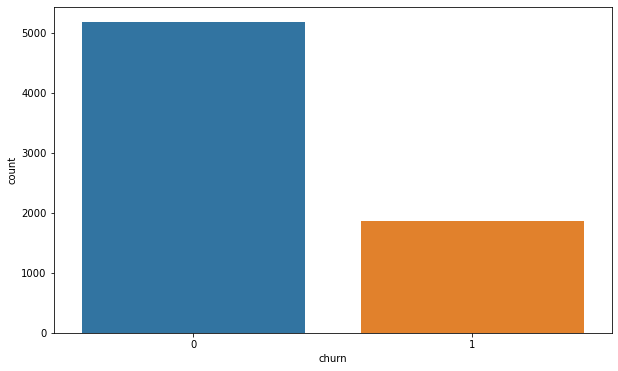

In [33]:
#visualize that data
plt.figure(figsize=(10,6))
sns.countplot(x='churn', data=df)
plt.show()

In [23]:
#find ou how many are senior citizens and how many are not
df.senior_citizen.value_counts()

#this shows that 16.21% of all customers are seniors (1142 out of 7043)

0    5901
1    1142
Name: senior_citizen, dtype: int64

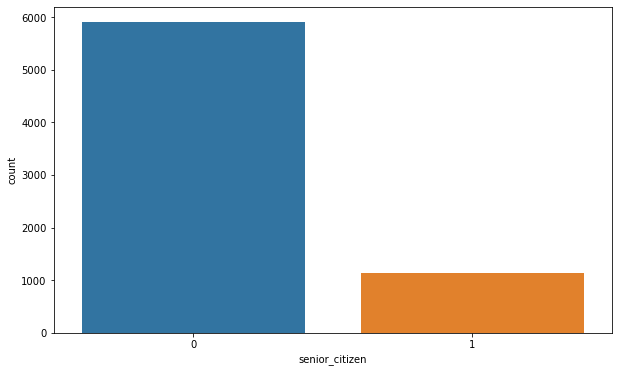

In [32]:
#visualize senior_citizen data
plt.figure(figsize=(10,6))
sns.countplot(x='senior_citizen', data=df)
plt.show()

In [26]:
#average tenure, max tenure, min tenure??
df.tenure.mean(), df.tenure.max(), df.tenure.min()

(32.37114865824223, 72, 0)

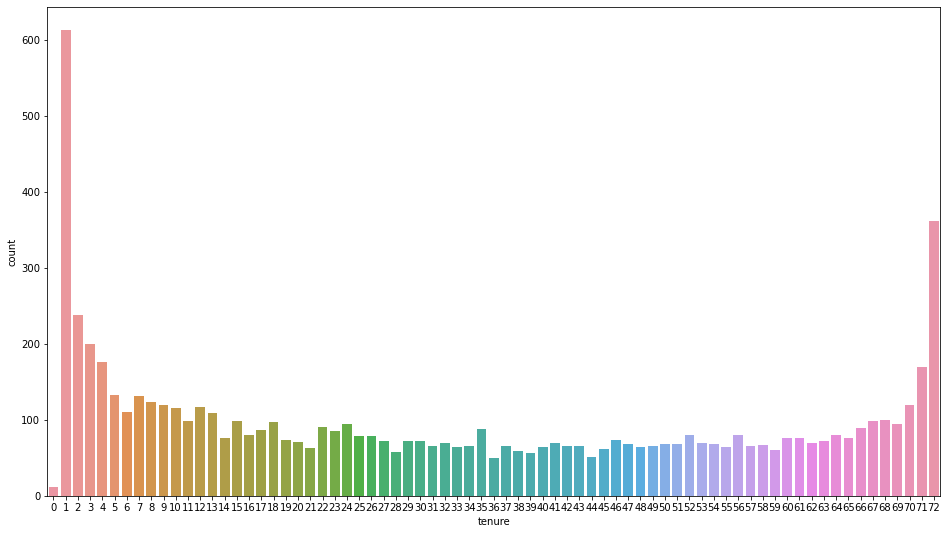

In [34]:
#visualize tenure data
plt.figure(figsize=(16,9))
sns.countplot(x='tenure', data=df)
plt.show()

In [35]:
#average monthly charges, max monthly charges, min monthly charges
df.monthly_charges.mean(), df.monthly_charges.max(), df.monthly_charges.min()

(64.76169246059882, 118.75, 18.25)

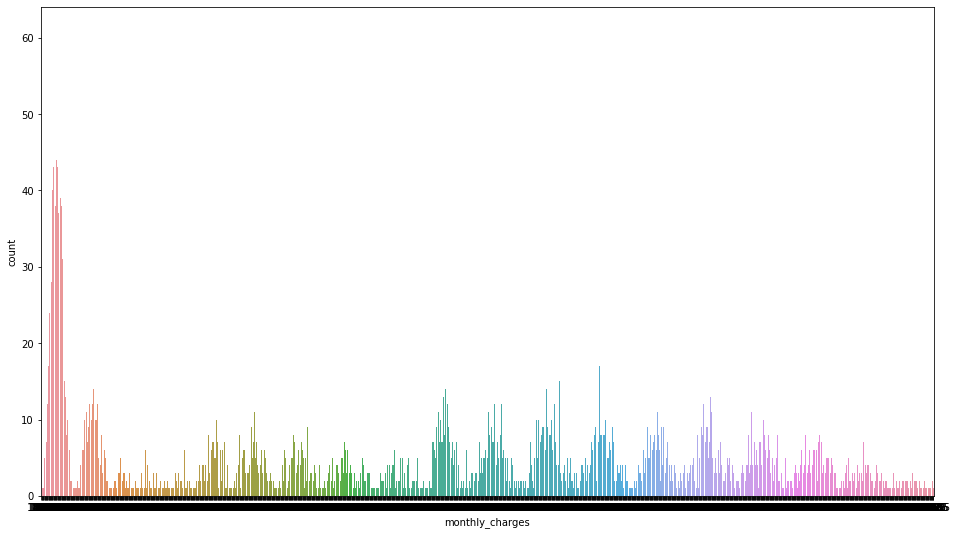

In [37]:
#visualize monthly charge data
plt.figure(figsize=(16,9))
sns.countplot(x='monthly_charges', data=df)
plt.show()